The MCSResult object does not include 'degenerateSmartsQueryMolDict'; only one MCS might be available.


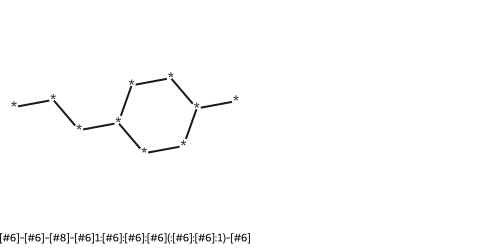

In [5]:
from rdkit import Chem
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import MolsToGridImage
import IPython.display as disp

# Example molecules
smiles_list = ["CCOc1ccc(CC)cc1", "CCOc1ccc(C)cc1", "CCOc1ccc(CC(C)C)cc1"]
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Set up MCS parameters with StoreAll set to True
params = rdFMCS.MCSParameters()
params.StoreAll = True

# Find the MCS
mcs_result = rdFMCS.FindMCS(mols, params)
# Try to access the degenerate dictionary; if not present, use a fallback.
if hasattr(mcs_result, "degenerateSmartsQueryMolDict"):
    degenerate_dict = mcs_result.degenerateSmartsQueryMolDict
else:
    print(
        "The MCSResult object does not include 'degenerateSmartsQueryMolDict'; only one MCS might be available."
    )
    degenerate_dict = {mcs_result.smartsString: mcs_result.queryMol}

# Prepare visualization of multiple MCS solutions
mcs_mols = []
legends = []
for smarts, query_mol in degenerate_dict.items():
    mcs_mols.append(query_mol)
    legends.append(smarts)

# Display the grid image of multiple MCSs
img = MolsToGridImage(mcs_mols, legends=legends, molsPerRow=2, subImgSize=(250, 250))
disp.display(img)

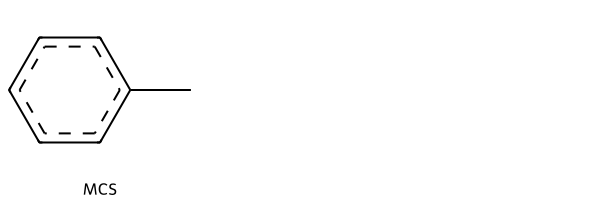

In [4]:
img